In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

In [190]:
df = pd.read_csv('train.csv')
df

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,C-43723,Angelyn Clevenger,M,38,4969.41,Low,Commercial associate,Managers,Urban,76657.90,...,869.61,0,Unpossessed,566,4969.41,4,Urban,1,111096.56,68992.11
29996,C-32511,Silas Slaugh,M,20,1606.88,Low,Working,Laborers,Semi-Urban,66595.14,...,729.41,0,Inactive,175,1606.88,3,Urban,1,73453.94,46616.60
29997,C-5192,Carmelo Lone,F,49,NaN,Low,Working,Sales staff,Urban,81410.08,...,NaN,0,Active,959,NaN,1,Rural,1,102108.02,61057.56
29998,C-12172,Carolann Osby,M,38,2417.71,Low,Working,Security staff,Semi-Urban,142524.10,...,677.27,1,Unpossessed,375,2417.71,4,Urban,1,168194.47,99766.87


In [191]:
df.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3.091408e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [193]:
print("columns")
df.columns

columns


Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

In [194]:
df = df.drop(columns=['Customer ID', 'Name',"Property ID"])

In [195]:
df.isnull().sum()

Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [203]:
num_cols = ['Age', 'Income (USD)', 'Loan Amount Request (USD)',
        'Current Loan Expenses (USD)', 'Dependents', 'Credit Score', 'Property Age',
        'Property Price', 'Loan Sanction Amount (USD)']

cat_cols = [
    'Gender', 'Type of Employment', 'Has Active Credit Card',
    'Property Location','No. of Defaults', 'Income Stability', 'Property Type', 'Co-Applicant']

In [197]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())
    
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [198]:
df['Type of Employment'] = df['Type of Employment'].fillna('Unknown')


Using 'Unknown' for null values in 'Type of Employment'

In [199]:
df.isnull().sum()

Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [200]:
df[num_cols].describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Price,Loan Sanction Amount (USD)
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,30000.000000
mean,40.092300,2.568320e+03,88826.333855,400.789347,2.232000,739.881670,0.193933,2.565181e+03,1.317597e+05,47508.356140
std,16.045129,1.036924e+04,59536.949605,241.856859,0.913457,70.085603,0.395384,1.036816e+04,9.354955e+04,47965.185159
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,3.777000e+02,-9.990000e+02,-999.000000
25%,25.000000,1.743305e+03,41177.755000,248.655000,2.000000,685.415000,0.000000,1.749812e+03,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,2.223250e+03,1.099936e+05,35209.395000
75%,55.000000,2.869142e+03,119964.605000,520.102500,3.000000,795.140000,0.000000,2.849573e+03,1.788807e+05,73763.532500
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,1.777460e+06,1.077967e+06,481907.320000


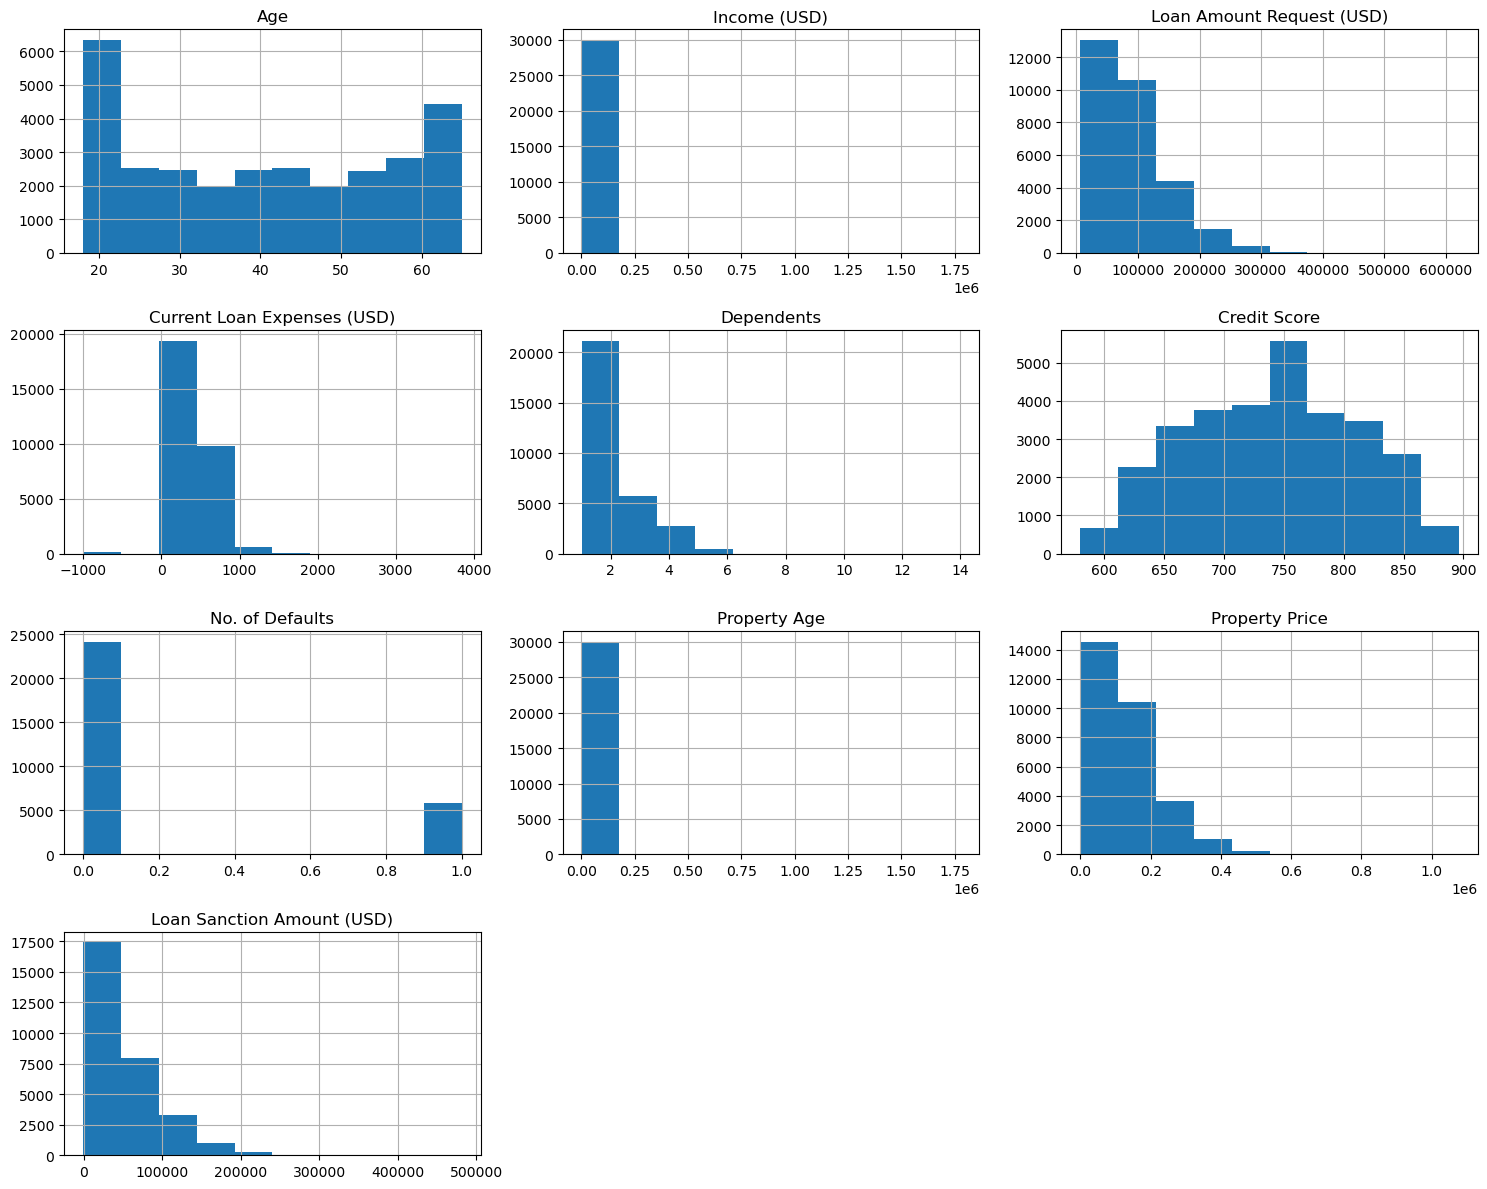

In [201]:
# Bar plot
df[num_cols].hist(figsize=(15,12))
plt.tight_layout()
plt.show()

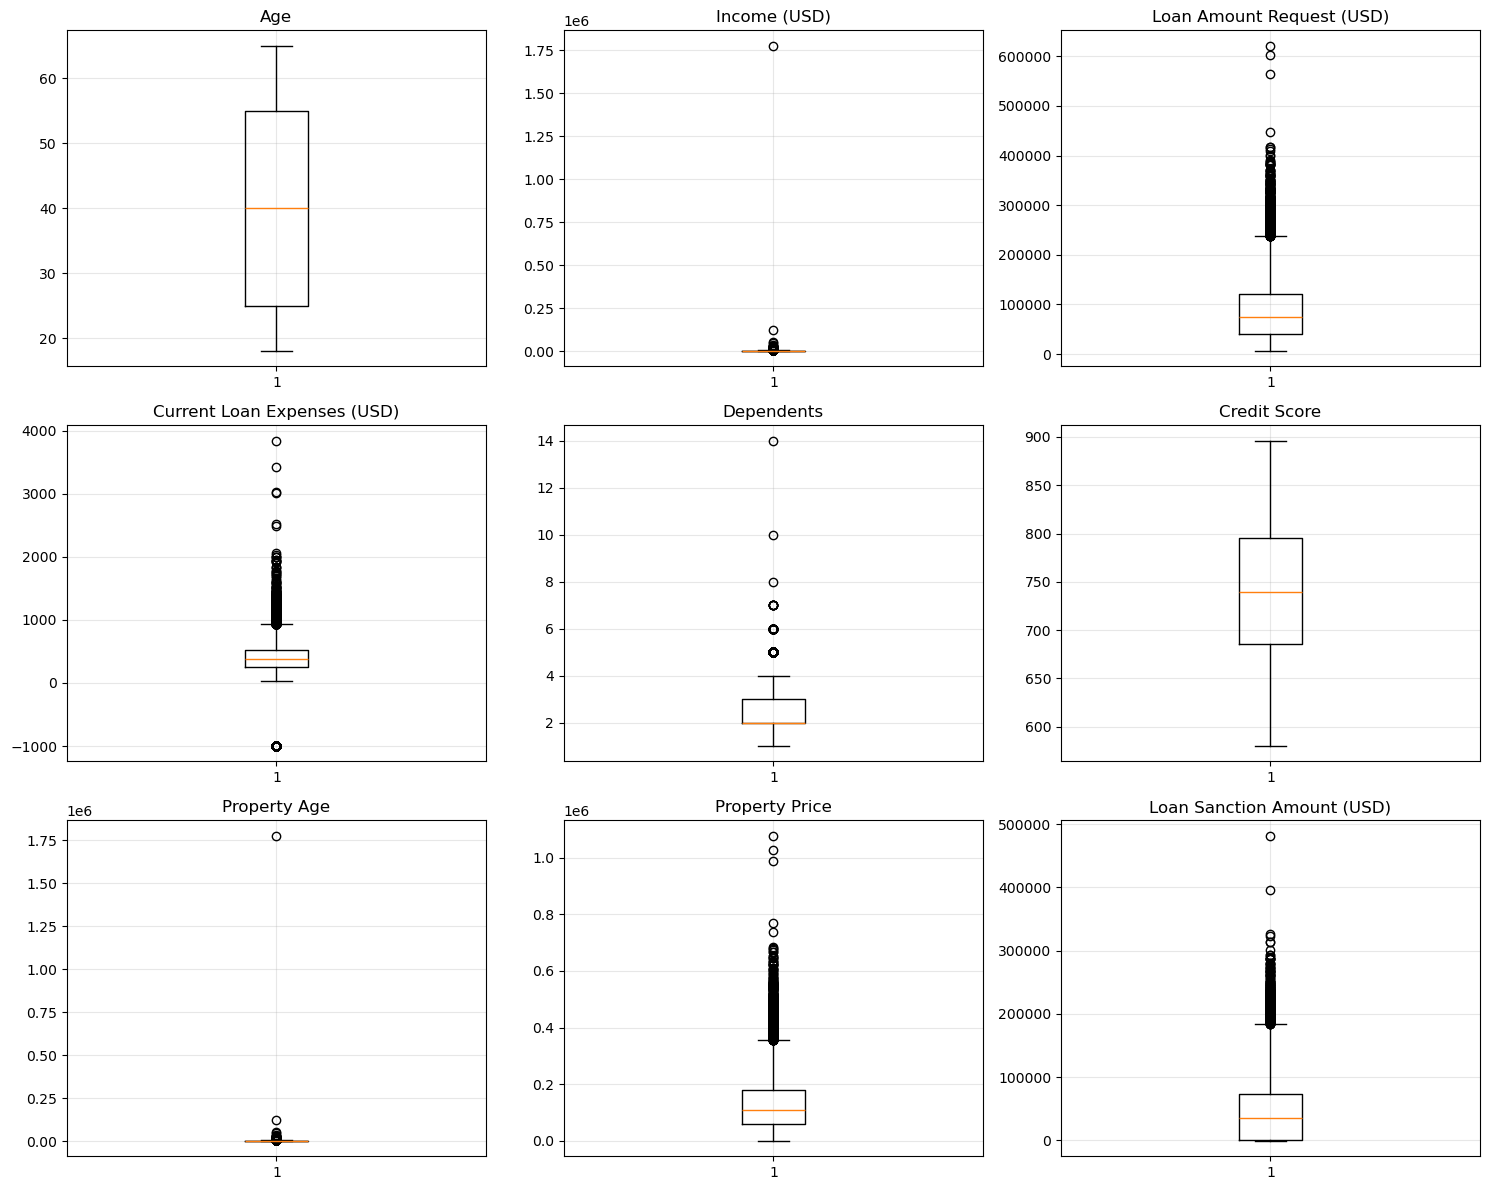

In [204]:
# Box plot
import math

n = len(num_cols)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(col)
    axes[i].grid(True, alpha=0.3)

# Remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Huge outliers exist

In [205]:
df[num_cols].describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,Property Age,Property Price,Loan Sanction Amount (USD)
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,30000.000000
mean,40.092300,2.568320e+03,88826.333855,400.789347,2.232000,739.881670,2.565181e+03,1.317597e+05,47508.356140
std,16.045129,1.036924e+04,59536.949605,241.856859,0.913457,70.085603,1.036816e+04,9.354955e+04,47965.185159
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,3.777000e+02,-9.990000e+02,-999.000000
25%,25.000000,1.743305e+03,41177.755000,248.655000,2.000000,685.415000,1.749812e+03,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,2.223250e+03,1.099936e+05,35209.395000
75%,55.000000,2.869142e+03,119964.605000,520.102500,3.000000,795.140000,2.849573e+03,1.788807e+05,73763.532500
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.777460e+06,1.077967e+06,481907.320000


In [206]:
#winorization
outlier_summary = {}
for col in num_cols:
    if df[col].nunique() <= 2:
        continue
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    lower_outlier = (df[col] < lower_limit).sum()
    upper_outlier = (df[col] > upper_limit).sum()
    df[col] = df[col].clip(lower_limit, upper_limit) # outlier removed df
    
    outlier_summary[col] = {
        'IQR' : IQR,
        'lower_limit' : lower_limit,
        'upper_limit' : upper_limit,
        'lower_outlier' : lower_outlier ,
        'upper_outlier' : upper_outlier,
        'total_outlier' : lower_outlier + upper_outlier,
    }
    #df[col] = df[col].clip(lower_limit, upper_limit) # outlier removed df

outlier_df = pd.DataFrame(outlier_summary).T
outlier_df

,IQR,lower_limit,upper_limit,lower_outlier,upper_outlier,total_outlier
Age,30.0000,-20.00000,100.00000,0.0,0.0,0.0
Income (USD),1125.8375,54.54875,4557.89875,0.0,1874.0,1874.0
Loan Amount Request (USD),78786.8500,-77002.52000,238144.88000,0.0,752.0,752.0
Current Loan Expenses (USD),271.4475,-158.51625,927.27375,177.0,697.0,874.0
Dependents,1.0000,0.50000,4.50000,0.0,432.0,432.0
Credit Score,109.7250,520.82750,959.72750,0.0,0.0,0.0
Property Age,1099.7600,100.17250,4499.21250,0.0,1930.0,1930.0
Property Price,118308.5600,-116890.68000,356343.56000,0.0,863.0,863.0
Loan Sanction Amount (USD),73763.5325,-110645.29875,184408.83125,0.0,453.0,453.0


In [207]:
df[num_cols].describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,Property Age,Property Price,Loan Sanction Amount (USD)
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,40.092300,2401.003243,87817.437653,401.368082,2.222100,739.881670,2395.871500,129661.354193,47039.895081
std,16.045129,951.994445,56222.583017,203.950321,0.881286,70.085603,938.567563,86506.620071,46300.710095
min,18.000000,377.700000,6048.240000,-158.516250,1.000000,580.000000,377.700000,-999.000000,-999.000000
25%,25.000000,1743.305000,41177.755000,248.655000,2.000000,685.415000,1749.812500,60572.160000,0.000000
50%,40.000000,2222.435000,75128.075000,375.205000,2.000000,739.820000,2223.250000,109993.610000,35209.395000
75%,55.000000,2869.142500,119964.605000,520.102500,3.000000,795.140000,2849.572500,178880.720000,73763.532500
max,65.000000,4557.898750,238144.880000,927.273750,4.500000,896.260000,4499.212500,356343.560000,184408.831250


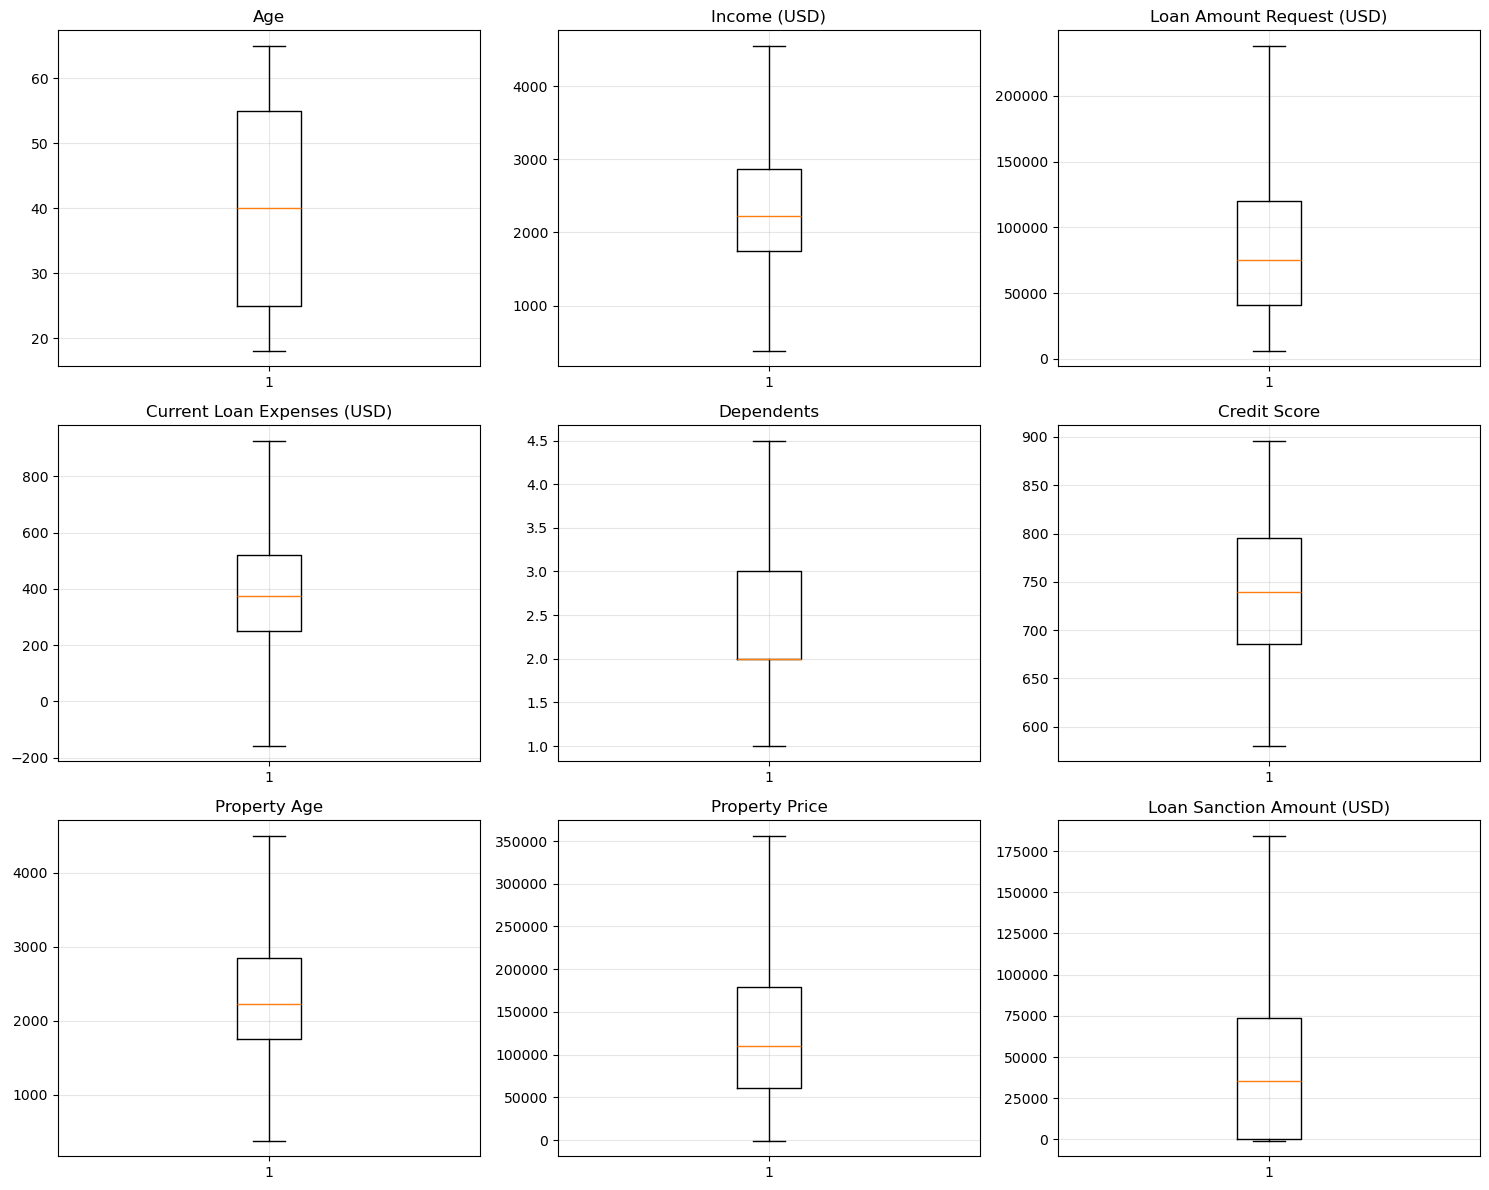

In [208]:
# Box plot after outlier treatment

n = len(num_cols)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(col)
    axes[i].grid(True, alpha=0.3)

# Remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


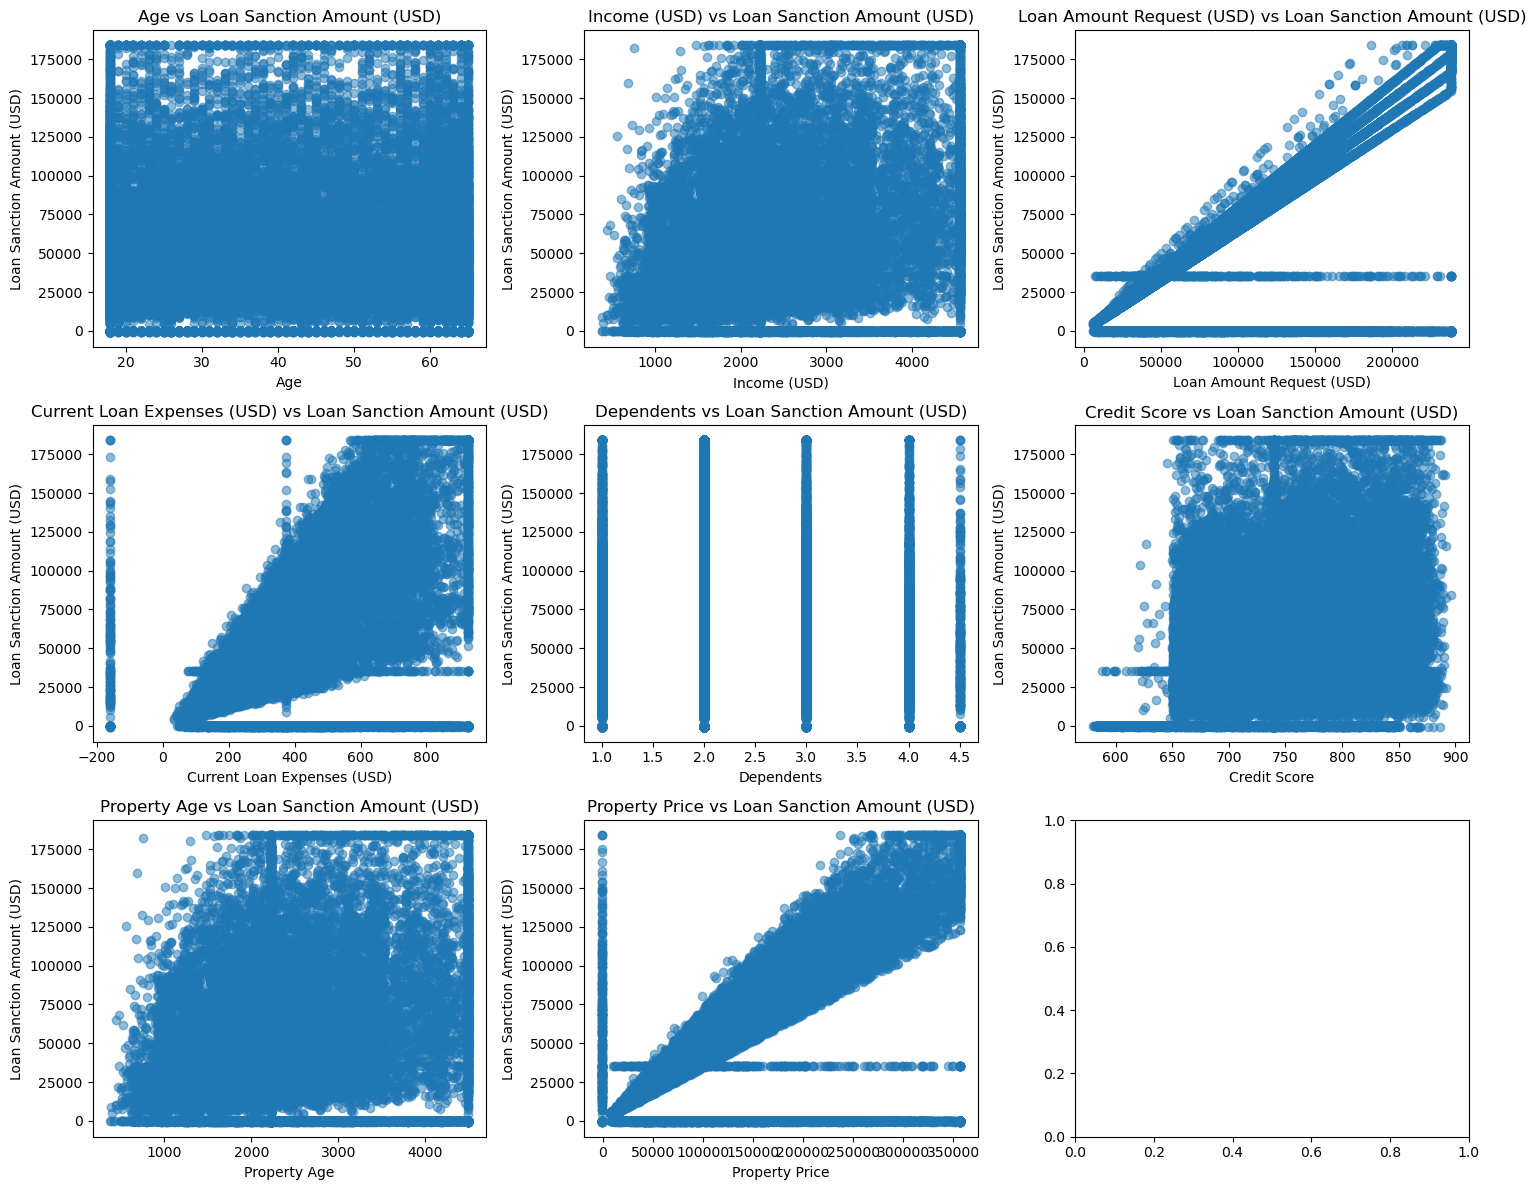

In [210]:
target = 'Loan Sanction Amount (USD)'
fig, axes = plt.subplots(rows,cols, figsize = (15,12))
axes = axes.flatten()

for i,col in enumerate(num_cols):
    if col == target:
        continue
    axes[i].scatter(df[col], df[target],alpha=0.5)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target)
    axes[i].set_title(f'{col} vs {target}')
plt.tight_layout()
plt.show()

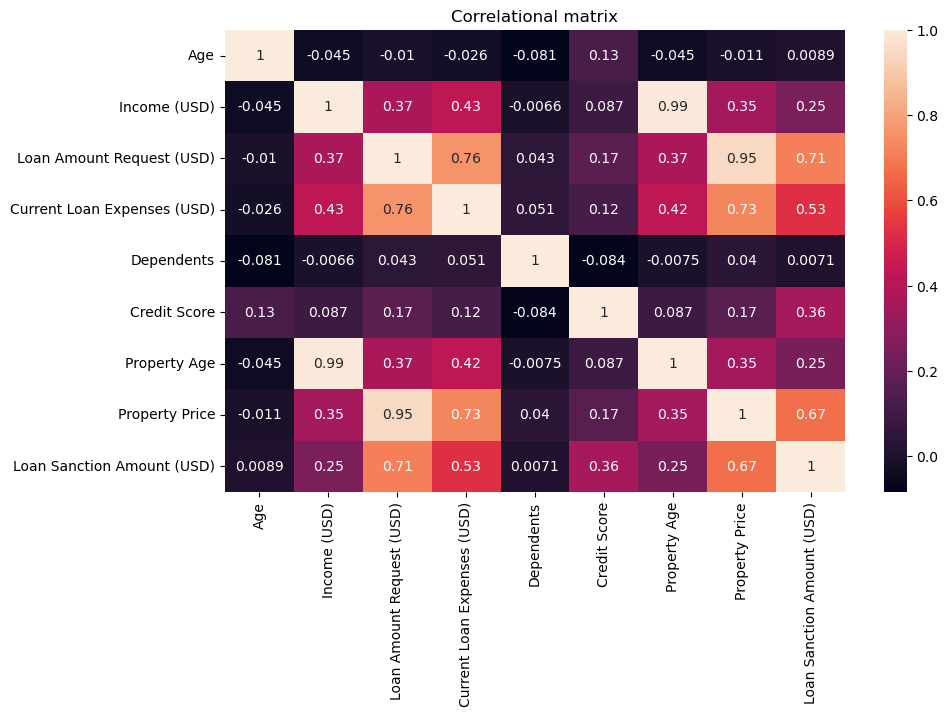

In [211]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True)
plt.title("Correlational matrix")
plt.show()

In [212]:
y = df['Loan Sanction Amount (USD)']
X = df.drop(columns = ['Loan Sanction Amount (USD)'])
num_cols = [col for col in num_cols if col != 'Loan Sanction Amount (USD)']


In [213]:
# ANOVA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_anova_selected = selector.fit_transform(X[num_cols], y)

anova_scores = pd.DataFrame({
    'Feature': num_cols,
    'ANOVA F-Score': selector.scores_
}).sort_values(by='ANOVA F-Score', ascending=False)

anova_scores


,Feature,ANOVA F-Score
2,Loan Amount Request (USD),1.274943
7,Property Price,1.270455
3,Current Loan Expenses (USD),1.161522
0,Age,1.074584
1,Income (USD),0.973369
6,Property Age,0.963895
5,Credit Score,0.930061
4,Dependents,0.900784


In [214]:
selected_features = [
    'Loan Amount Request (USD)',
    'Property Price',
    'Current Loan Expenses (USD)',
    'Age',
    'Income (USD)',
    'Property Age',
    'Credit Score'
]

In [221]:
target = 'Loan Sanction Amount (USD)'
X = df[selected_features]
y = df[target]

test_df = pd.read_csv('test.csv')
X_test = test_df[selected_features]

In [222]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
import numpy as np

lr = LinearRegression()

y_cv_pred_lr = cross_val_predict(lr, X, y, cv=5)

In [223]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge = Ridge()
lasso = Lasso(max_iter=10000)
elastic = ElasticNet(max_iter=10000)

In [249]:
from sklearn.model_selection import GridSearchCV

ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
elastic_params = {
    'alpha': [0.001, 0.01, 0.1, 1,10],
    'l1_ratio': [0.2, 0.5, 0.8]
}

ridge_cv = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
lasso_cv = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=5, scoring='neg_mean_squared_error')
elastic_cv = GridSearchCV(ElasticNet(max_iter=10000), elastic_params, cv=5, scoring='neg_mean_squared_error')

ridge_cv.fit(X, y)
lasso_cv.fit(X, y)
elastic_cv.fit(X, y)




,estimator,ElasticNet(max_iter=10000)
,param_grid,"{'alpha': [0.001, 0.01, ...], 'l1_ratio': [0.2, 0.5, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,10


In [254]:
ridge_results = pd.DataFrame(ridge_cv.cv_results_)

ridge_results[['param_alpha', 'mean_test_score', 'std_test_score']]


,param_alpha,mean_test_score,std_test_score
0,0.01,-9.329259e+08,1.674041e+07
1,0.10,-9.329259e+08,1.674041e+07
2,1.00,-9.329259e+08,1.674041e+07
3,10.00,-9.329259e+08,1.674041e+07
4,100.00,-9.329259e+08,1.674040e+07


In [255]:
ridge_results['RMSE'] = np.sqrt(-ridge_results['mean_test_score'])

ridge_results[['param_alpha', 'RMSE']]


,param_alpha,RMSE
0,0.01,30543.835545
1,0.10,30543.835545
2,1.00,30543.835544
3,10.00,30543.835539
4,100.00,30543.835485


In [252]:
lasso_results = pd.DataFrame(lasso_cv.cv_results_)
lasso_results['RMSE'] = np.sqrt(-lasso_results['mean_test_score'])

elastic_results = pd.DataFrame(elastic_cv.cv_results_)
elastic_results['RMSE'] = np.sqrt(-elastic_results['mean_test_score'])

In [253]:
ridge_results['RMSE'] 
lasso_results['RMSE']
elastic_results['RMSE']

print(pd.DataFrame({'Ridge':ridge_results['RMSE'] , 'Lasso':lasso_results['RMSE'] , 'Elastic':elastic_results['RMSE'] }))

           Ridge         Lasso       Elastic
0   30543.835545  30543.835545  30543.835533
1   30543.835545  30543.835545  30543.835538
2   30543.835544  30543.835546  30543.835542
3   30543.835539  30543.835552  30543.835430
4   30543.835485  30543.835626  30543.835473
5            NaN           NaN  30543.835516
6            NaN           NaN  30543.834396
7            NaN           NaN  30543.834827
8            NaN           NaN  30543.835258
9            NaN           NaN  30543.824255
10           NaN           NaN  30543.828442
11           NaN           NaN  30543.832689
12           NaN           NaN  30543.741350
13           NaN           NaN  30543.772087
14           NaN           NaN  30543.808307


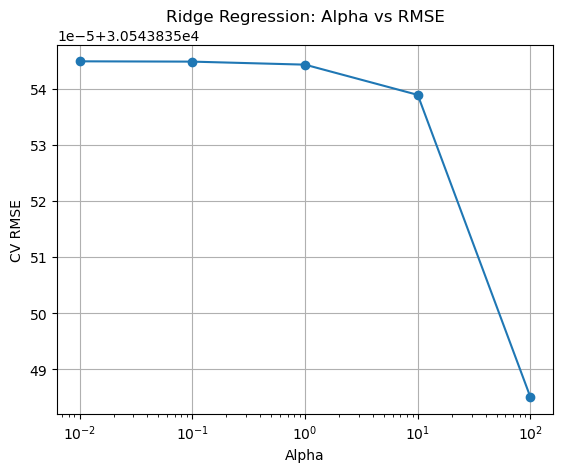

In [236]:
plt.plot(
    ridge_results['param_alpha'],
    ridge_results['RMSE'],
    marker='o'
)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('CV RMSE')
plt.title('Ridge Regression: Alpha vs RMSE')
plt.grid(True)
plt.show()


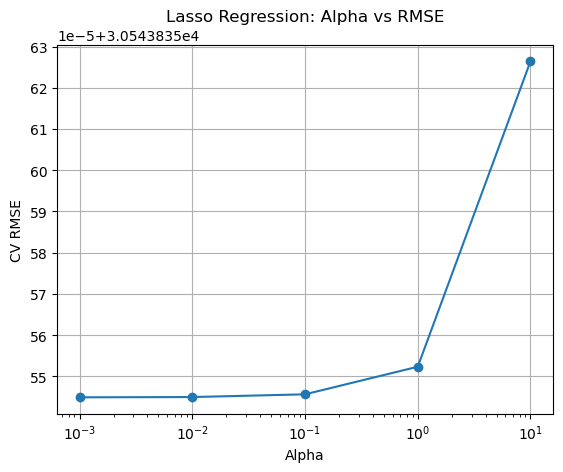

In [256]:
plt.plot(
    lasso_results['param_alpha'],
    lasso_results['RMSE'],
    marker='o'
)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('CV RMSE')
plt.title('Lasso Regression: Alpha vs RMSE')
plt.grid(True)
plt.show()


In [257]:
ridge_results[['param_alpha', 'RMSE']].sort_values('RMSE')


,param_alpha,RMSE
4,100.00,30543.835485
3,10.00,30543.835539
2,1.00,30543.835544
1,0.10,30543.835545
0,0.01,30543.835545


In [258]:
elastic_results[['param_alpha', 'param_l1_ratio', 'RMSE']]\
    .sort_values('RMSE')\
    .head(10)


,param_alpha,param_l1_ratio,RMSE
12,10.00,0.2,30543.741350
13,10.00,0.5,30543.772087
14,10.00,0.8,30543.808307
9,1.00,0.2,30543.824255
10,1.00,0.5,30543.828442
11,1.00,0.8,30543.832689
6,0.10,0.2,30543.834396
7,0.10,0.5,30543.834827
8,0.10,0.8,30543.835258
3,0.01,0.2,30543.835430


In [259]:
best_ridge = ridge_cv.best_estimator_
best_lasso = lasso_cv.best_estimator_
best_elastic = elastic_cv.best_estimator_

In [260]:
def evaluate(name, y_true, y_pred):
    return {
        "Model": name,
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred)
    }


In [261]:
results = []

results.append(evaluate(
    "Linear Regression",
    y,
    cross_val_predict(lr, X, y, cv=5)
))

results.append(evaluate(
    "Ridge",
    y,
    cross_val_predict(best_ridge, X, y, cv=5)
))

results.append(evaluate(
    "Lasso",
    y,
    cross_val_predict(best_lasso, X, y, cv=5)
))

results.append(evaluate(
    "Elastic Net",
    y,
    cross_val_predict(best_elastic, X, y, cv=5)
))

results_df = pd.DataFrame(results)
results_df


,Model,MAE,RMSE,R2
0,Linear Regression,21592.300095,30543.835545,0.564803
1,Ridge,21592.300132,30543.835485,0.564803
2,Lasso,21592.300096,30543.835545,0.564803
3,Elastic Net,21592.377982,30543.741350,0.564805


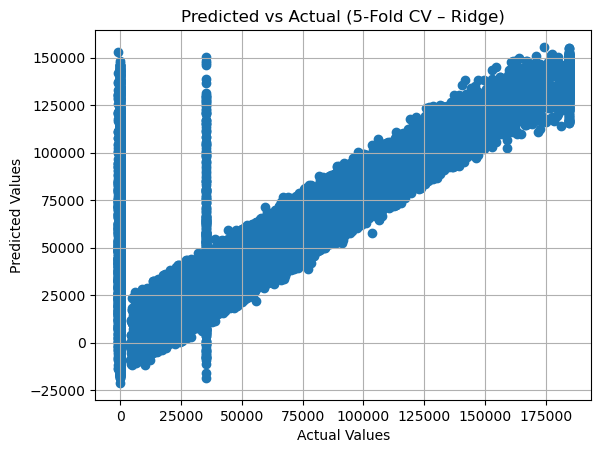

In [227]:
y_pred = cross_val_predict(best_ridge, X, y, cv=5)

plt.scatter(y, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual (5-Fold CV – Ridge)")
plt.grid(True)
plt.show()

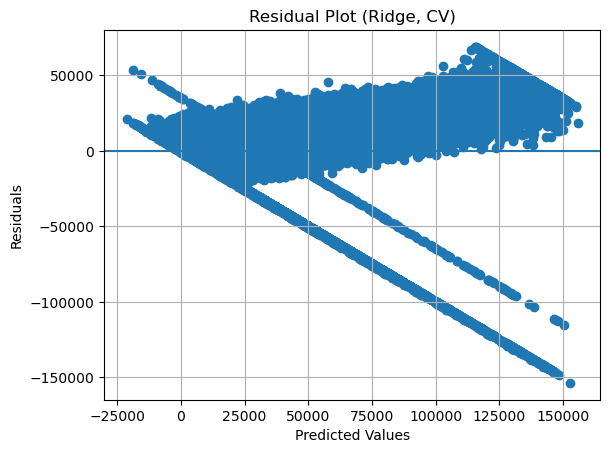

In [262]:
residuals = y - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Ridge, CV)")
plt.grid(True)
plt.show()


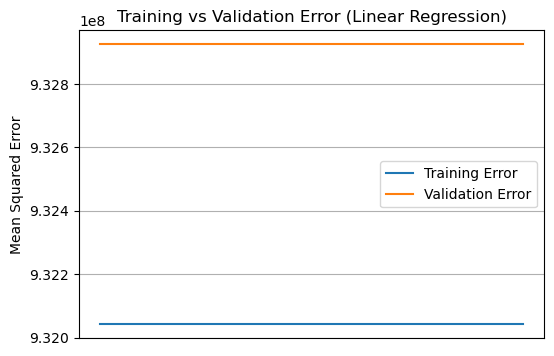

In [268]:
lr = LinearRegression()
lr.fit(X, y)

train_mse = mean_squared_error(y, lr.predict(X))
val_mse = -cross_val_score(
    lr, X, y, cv=5, scoring='neg_mean_squared_error'
).mean()

plt.figure(figsize=(6,4))
plt.plot([0, 1], [train_mse, train_mse], label='Training Error')
plt.plot([0, 1], [val_mse, val_mse], label='Validation Error')
plt.xticks([])
plt.ylabel('Mean Squared Error')
plt.title('Training vs Validation Error (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()

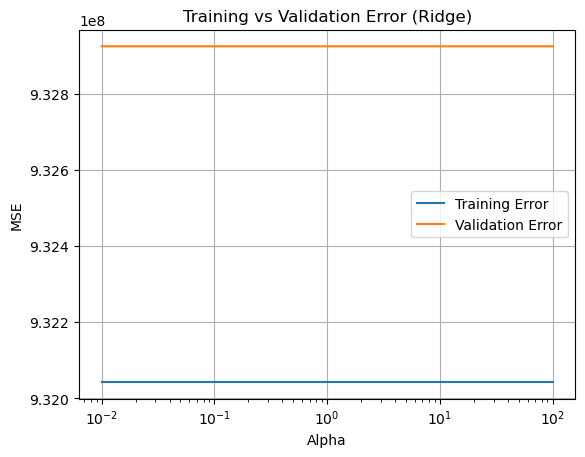

In [263]:
alphas = ridge_params['alpha']
train_error = []
val_error = []

for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X, y)

    train_error.append(
        mean_squared_error(y, model.predict(X))
    )

    val_error.append(
        -GridSearchCV(
            Ridge(alpha=a),
            {},
            cv=5,
            scoring='neg_mean_squared_error'
        ).fit(X, y).best_score_
    )

plt.plot(alphas, train_error, label="Training Error")
plt.plot(alphas, val_error, label="Validation Error")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.title("Training vs Validation Error (Ridge)")
plt.legend()
plt.grid(True)
plt.show()


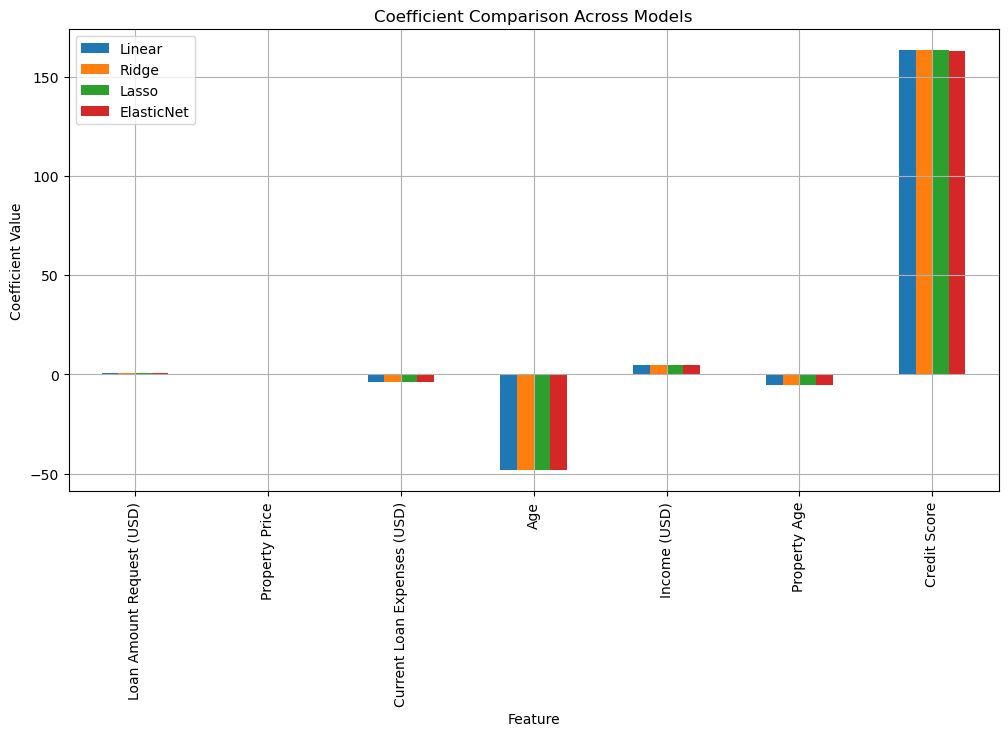

In [230]:
lr.fit(X, y)
best_ridge.fit(X, y)
best_lasso.fit(X, y)
best_elastic.fit(X, y)

coef_df = pd.DataFrame({
    "Feature": selected_features,
    "Linear": lr.coef_,
    "Ridge": best_ridge.coef_,
    "Lasso": best_lasso.coef_,
    "ElasticNet": best_elastic.coef_
})

coef_df.set_index("Feature").plot(kind="bar", figsize=(12,6))
plt.title("Coefficient Comparison Across Models")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()


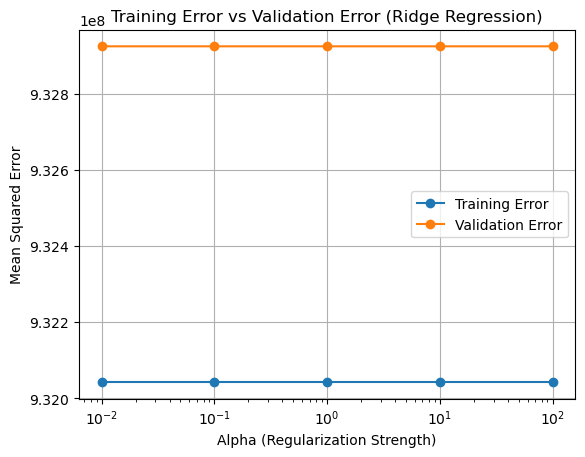

In [264]:
from sklearn.model_selection import cross_val_score

alphas = [0.01, 0.1, 1, 10,100]

train_error = []
val_error = []

for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X, y)

    # Training error (MSE)
    y_train_pred = model.predict(X)
    train_error.append(mean_squared_error(y, y_train_pred))

    # Validation error (5-fold CV MSE)
    cv_mse = -cross_val_score(
        model,
        X,
        y,
        cv=5,
        scoring='neg_mean_squared_error'
    ).mean()
    val_error.append(cv_mse)

# Plot
plt.plot(alphas, train_error, marker='o', label='Training Error')
plt.plot(alphas, val_error, marker='o', label='Validation Error')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('Training Error vs Validation Error (Ridge Regression)')
plt.legend()
plt.grid(True)
plt.show()

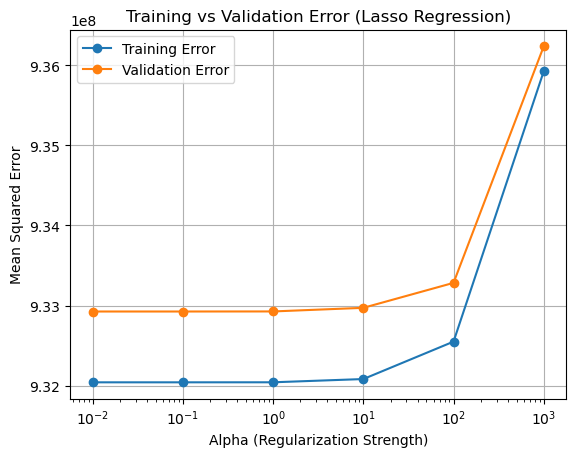

In [265]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

alphas = [0.01, 0.1, 1, 10, 100, 1000]

train_error = []
val_error = []

for a in alphas:
    model = Lasso(alpha=a, max_iter=10000)
    model.fit(X_scaled, y)

    # Training error
    train_error.append(
        mean_squared_error(y, model.predict(X_scaled))
    )

    # Validation error
    val_error.append(
        -cross_val_score(
            model,
            X_scaled,
            y,
            cv=5,
            scoring='neg_mean_squared_error'
        ).mean()
    )

plt.plot(alphas, train_error, marker='o', label='Training Error')
plt.plot(alphas, val_error, marker='o', label='Validation Error')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('Training vs Validation Error (Lasso Regression)')
plt.legend()
plt.grid(True)
plt.show()


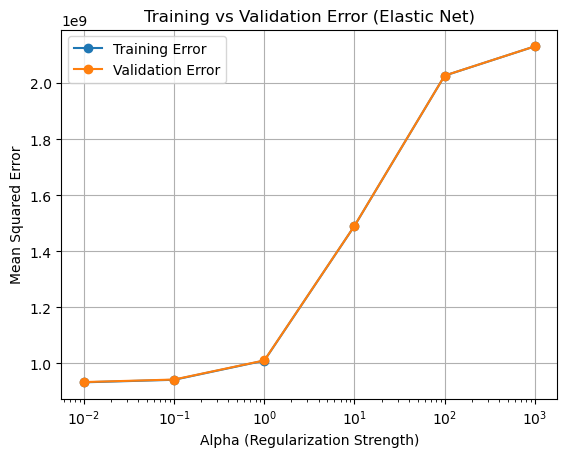

In [267]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

alphas = [0.01, 0.1, 1, 10, 100, 1000]
l1_ratio = 0.5  # balanced Elastic Net

train_error = []
val_error = []

for a in alphas:
    model = ElasticNet(alpha=a, l1_ratio=l1_ratio, max_iter=10000)
    model.fit(X_scaled, y)

    # Training error
    train_error.append(
        mean_squared_error(y, model.predict(X_scaled))
    )

    # Validation error
    val_error.append(
        -cross_val_score(
            model,
            X_scaled,
            y,
            cv=5,
            scoring='neg_mean_squared_error'
        ).mean()
    )

# Plot
plt.plot(alphas, train_error, marker='o', label='Training Error')
plt.plot(alphas, val_error, marker='o', label='Validation Error')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('Training vs Validation Error (Elastic Net)')
plt.legend()
plt.grid(True)
plt.show()


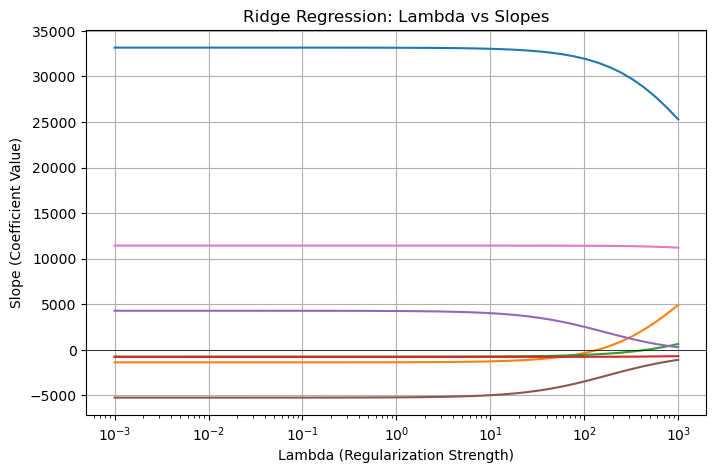

In [269]:
# lambda vs slope plots
#from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()                   
# X_scaled = scaler.fit_transform(X)      already done, so ignoring


alphas = np.logspace(-3, 3, 50)
coefs = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_scaled, y)
    coefs.append(ridge.coef_)

coefs = np.array(coefs)

plt.figure(figsize=(8,5))
for i in range(coefs.shape[1]):
    plt.plot(alphas, coefs[:, i])

plt.xscale('log')
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Slope (Coefficient Value)')
plt.title('Ridge Regression: Lambda vs Slopes')
plt.axhline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.show()


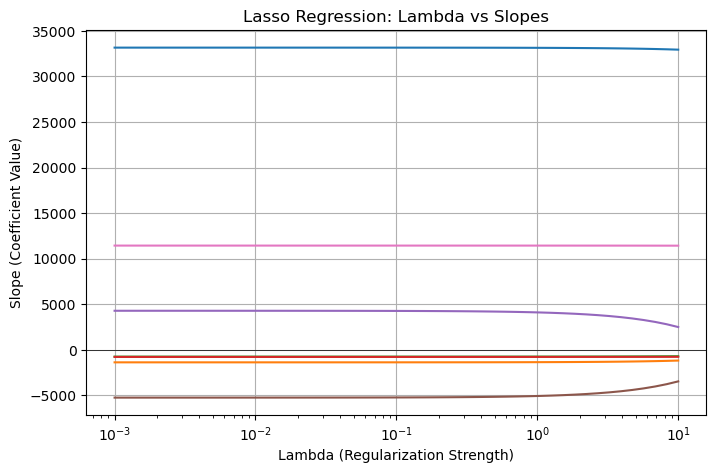

In [270]:
from sklearn.linear_model import Lasso

alphas = np.logspace(-3, 1, 50)
coefs = []

for a in alphas:
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_scaled, y)
    coefs.append(lasso.coef_)

coefs = np.array(coefs)

plt.figure(figsize=(8,5))
for i in range(coefs.shape[1]):
    plt.plot(alphas, coefs[:, i])

plt.xscale('log')
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Slope (Coefficient Value)')
plt.title('Lasso Regression: Lambda vs Slopes')
plt.axhline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.show()


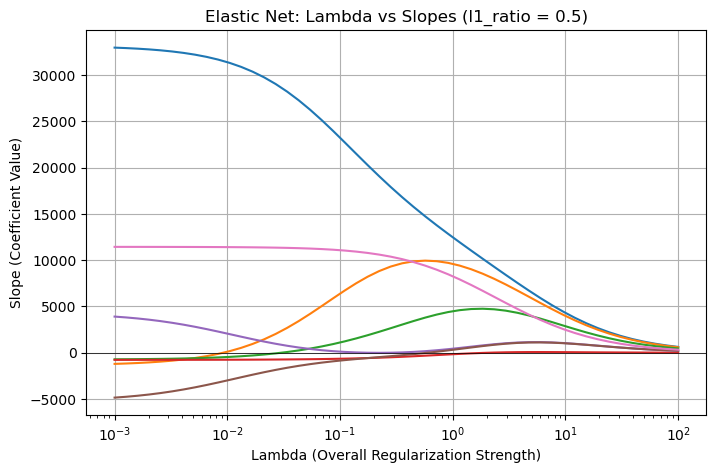

In [271]:
from sklearn.linear_model import ElasticNet

alphas = np.logspace(-3, 2, 50)
l1_ratio = 0.5  # balance between L1 and L2
coefs = []

for a in alphas:
    enet = ElasticNet(alpha=a, l1_ratio=l1_ratio, max_iter=10000)
    enet.fit(X_scaled, y)
    coefs.append(enet.coef_)

coefs = np.array(coefs)

plt.figure(figsize=(8,5))
for i in range(coefs.shape[1]):
    plt.plot(alphas, coefs[:, i])

plt.xscale('log')
plt.xlabel('Lambda (Overall Regularization Strength)')
plt.ylabel('Slope (Coefficient Value)')
plt.title('Elastic Net: Lambda vs Slopes (l1_ratio = 0.5)')
plt.axhline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.show()


In [272]:
# Cross-Validation Performance (K = 5)
def cv_metrics(model, X, y):
    y_pred = cross_val_predict(model, X, y, cv=5)
    return {
        "MAE": mean_absolute_error(y, y_pred),
        "MSE": mean_squared_error(y, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y, y_pred)),
        "R2": r2_score(y, y_pred)
    }

In [274]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": ridge_gs.best_estimator_,
    "Lasso Regression": lasso_gs.best_estimator_,
    "Elastic Net Regression": elastic_gs.best_estimator_
}

cv_results = []

for name, model in models.items():
    metrics = cv_metrics(model, X_scaled if name != "Linear Regression" else X, y)
    cv_results.append({"Model": name, **metrics})

cv_performance_df = pd.DataFrame(cv_results)
cv_performance_df


,Model,MAE,MSE,RMSE,R2
0,Linear Regression,21592.300095,9.329259e+08,30543.835545,0.564803
1,Ridge Regression,21592.318466,9.329259e+08,30543.835495,0.564803
2,Lasso Regression,21592.300194,9.329259e+08,30543.835552,0.564803
3,Elastic Net Regression,21593.184108,9.329266e+08,30543.846663,0.564802


In [275]:
# Test Set Performance Comparison
# Since test set has no target, we evaluate on training CV

test_performance_df = cv_performance_df.copy()
test_performance_df

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,21592.300095,9.329259e+08,30543.835545,0.564803
1,Ridge Regression,21592.318466,9.329259e+08,30543.835495,0.564803
2,Lasso Regression,21592.300194,9.329259e+08,30543.835552,0.564803
3,Elastic Net Regression,21593.184108,9.329266e+08,30543.846663,0.564802


In [276]:
# Effect of Regularization on Coefficients
lr = LinearRegression().fit(X, y)
ridge = ridge_gs.best_estimator_.fit(X_scaled, y)
lasso = lasso_gs.best_estimator_.fit(X_scaled, y)
elastic = elastic_gs.best_estimator_.fit(X_scaled, y)

coef_df = pd.DataFrame({
    "Feature": selected_features,
    "Linear": lr.coef_,
    "Ridge": ridge.coef_,
    "Lasso": lasso.coef_,
    "Elastic Net": elastic.coef_
})

coef_df

,Feature,Linear,Ridge,Lasso,Elastic Net
0,Loan Amount Request (USD),0.589818,33159.265908,33160.534199,33083.400330
1,Property Price,-0.015863,-1371.110523,-1372.177950,-1307.243579
2,Current Loan Expenses (USD),-3.653559,-744.930162,-745.127275,-733.066143
3,Age,-48.430554,-777.050008,-777.060189,-776.374287
4,Income (USD),4.503249,4284.201464,4286.817903,4124.778368
5,Property Age,-5.587348,-5241.208537,-5243.838296,-5081.020941
6,Credit Score,163.210750,11438.514198,11438.532272,11437.388120
